### FAKE NEWS DETECTION

##### importing the libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string
import nltk

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from nltk.stem.porter import PorterStemmer

In [ ]:
# nltk.download()

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df_fake = pd.read_csv("/content/drive/MyDrive/Colab Data/Fake.csv")
df_true = pd.read_csv("/content/drive/MyDrive/Colab Data/True.csv")

In [ ]:
df_fake["class"] = 0
df_true["class"] = 1 #creating a class column this will serve as the label of the data

In [ ]:
df_merged = pd.concat([df_fake,df_true], axis = 0) #merging both dataframe frames into one dataframe

In [ ]:
df_merged = df_merged.sample(frac = 1) #shuffling the data

In [ ]:
df_merged.reset_index(inplace = True) #resettting the index of the dataset
df_merged.drop(["index"], axis = 1, inplace = True)#dropping the old index of the dataset

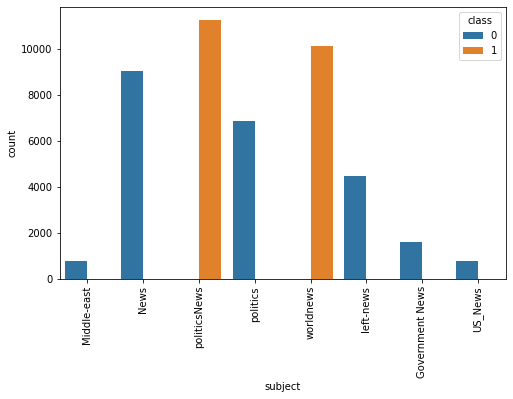

In [ ]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x="subject", hue="class", data=df_merged)
plt.xticks(rotation=90)
plt.show()

-  Politics news and world news are mostly true news

In [ ]:
from wordcloud import WordCloud, STOPWORDS

def news_cloud(text):
    wordcloud = WordCloud(
        width = 3000,
        height = 2000,
        background_color = 'black').generate(str(text))
    fig = plt.figure(
        figsize = (40, 30),
        facecolor = 'k',
        edgecolor = 'k')
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()

In [ ]:
fake_news = df_merged[df_merged['class']==0]
true_news = df_merged[df_merged['class']==1]

In [ ]:
import nltk
nltk.download('punkt')

def tokenizeandstopwords(text):
    tokens = nltk.word_tokenize(text)
    token_words = [w for w in tokens if w.isalpha()]
    meaningful_words = [w for w in token_words if not w in list(STOPWORDS)]
    joined_words = ( " ".join(meaningful_words))
    return joined_words

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
fake_news['text'] = fake_news['text'].apply(tokenizeandstopwords)
true_news['text'] = true_news['text'].apply(tokenizeandstopwords)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


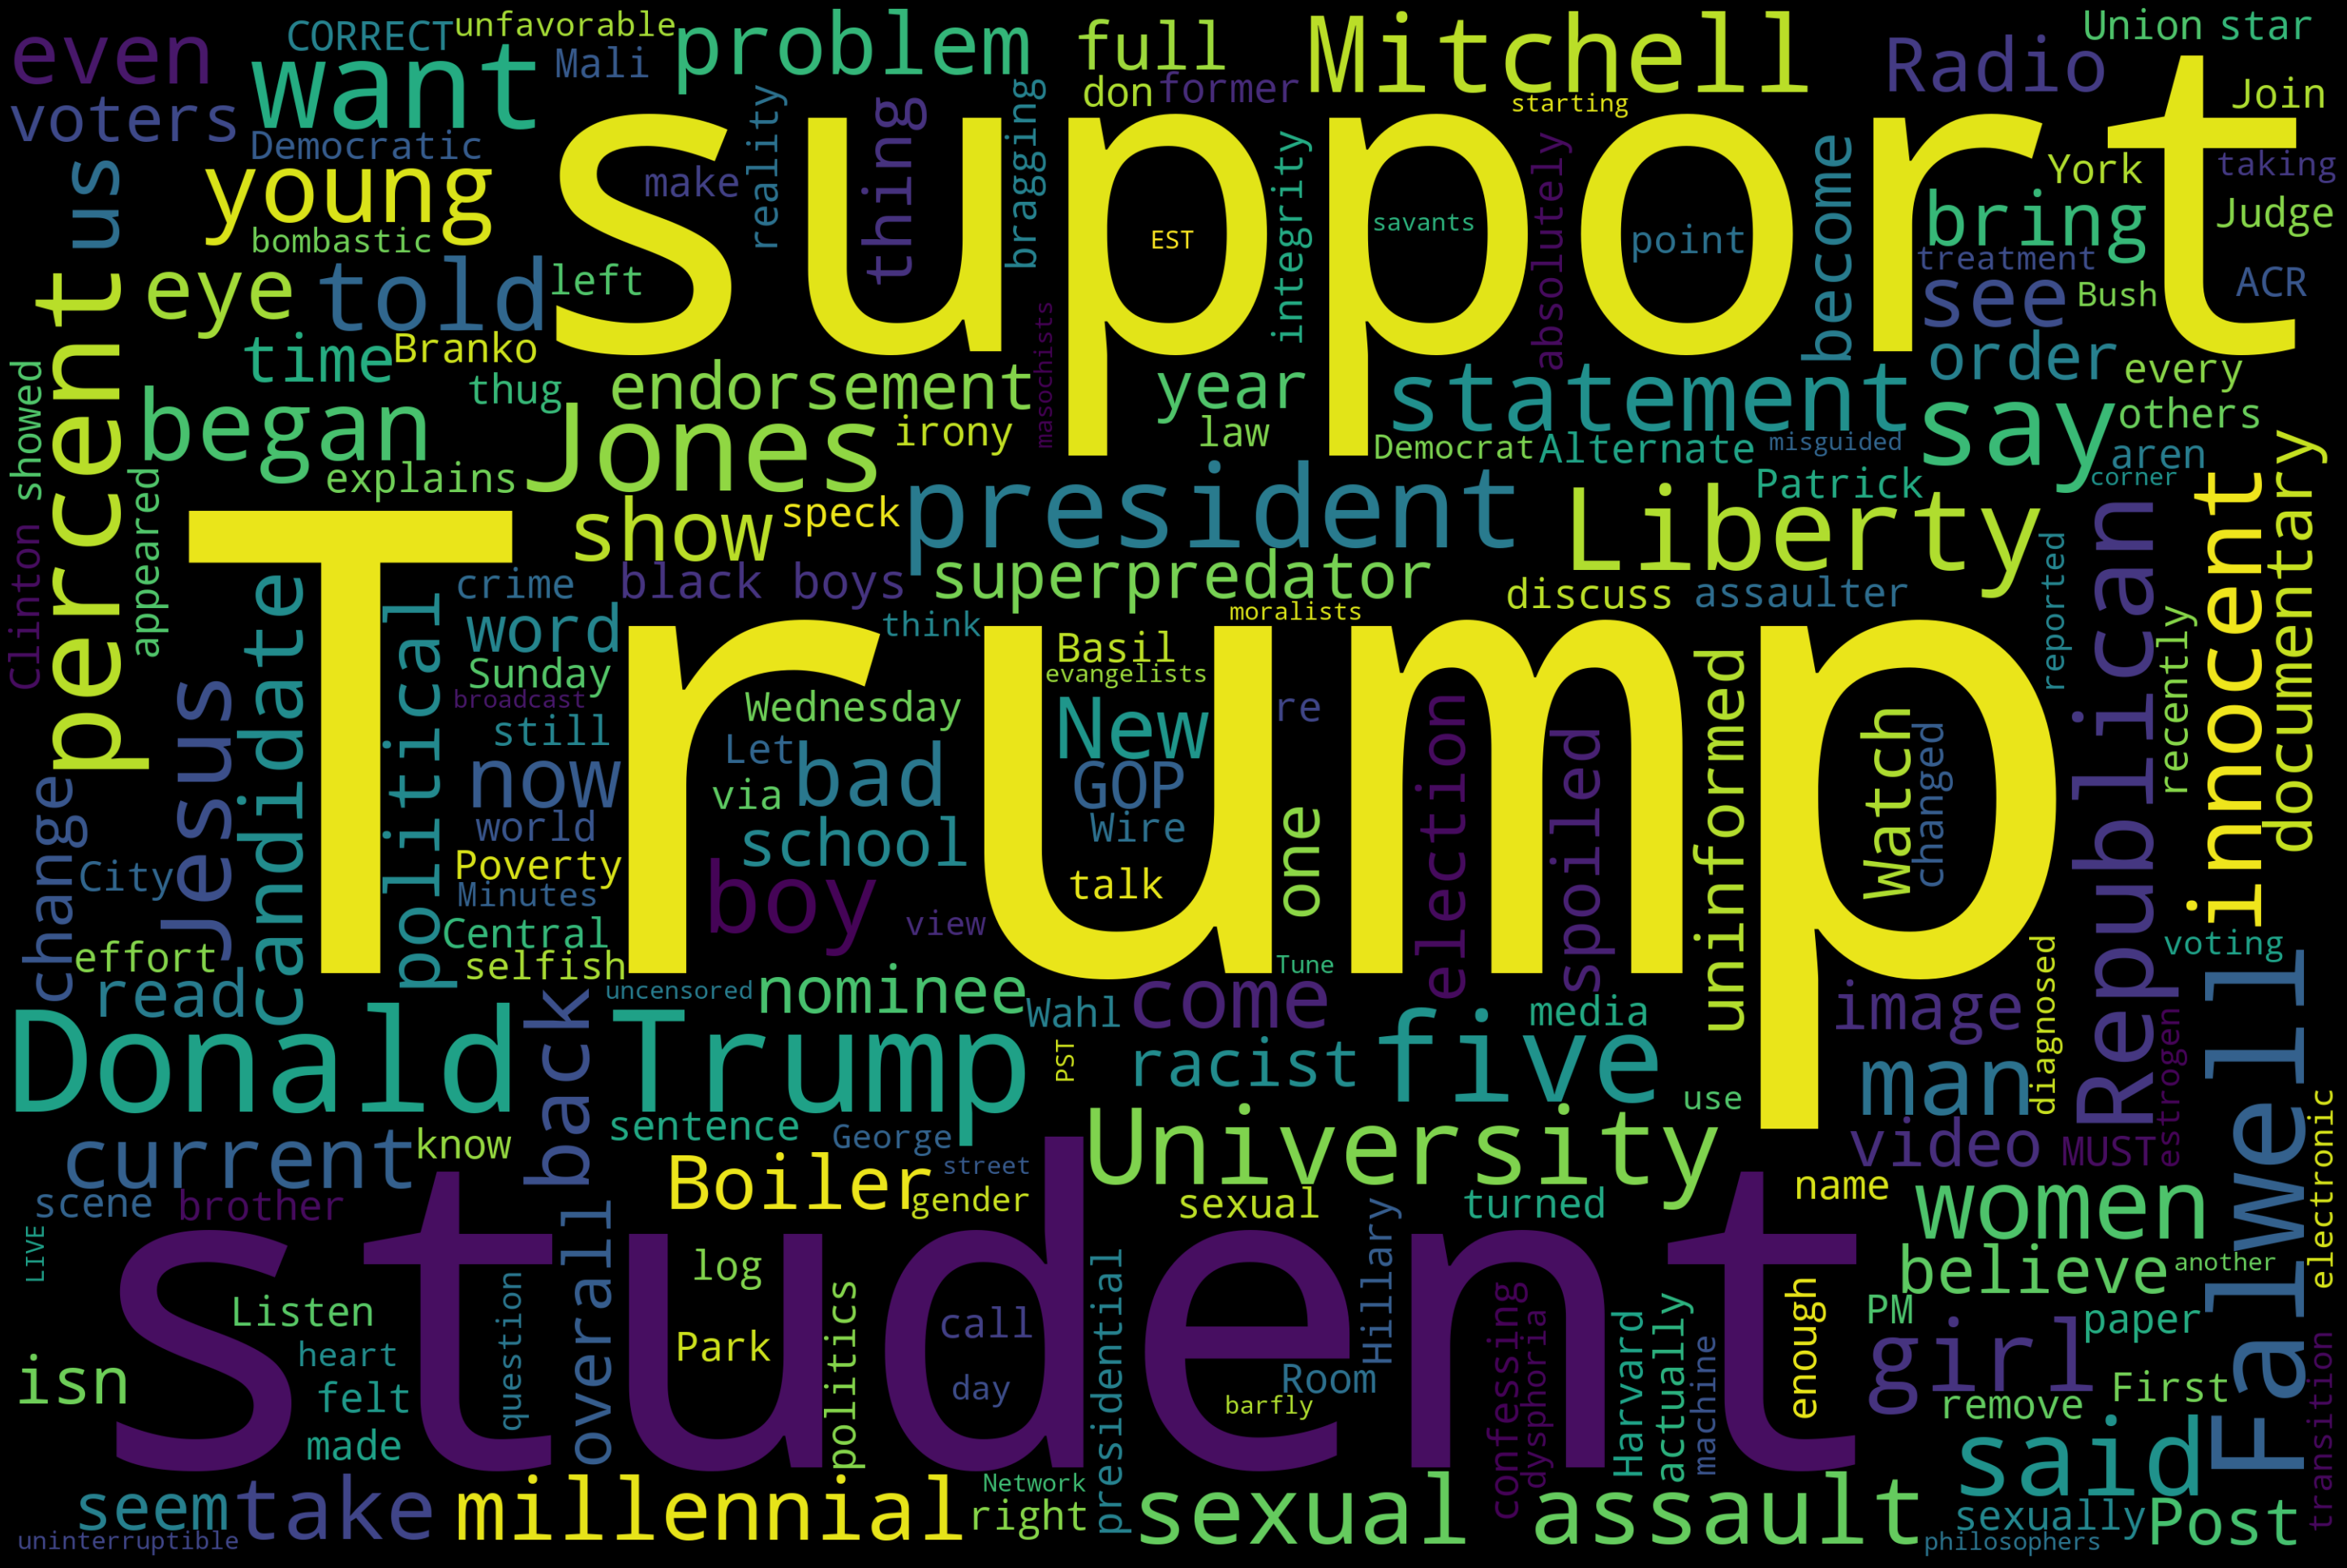

In [ ]:
fake_text = fake_news['text'].values
news_cloud(fake_text)

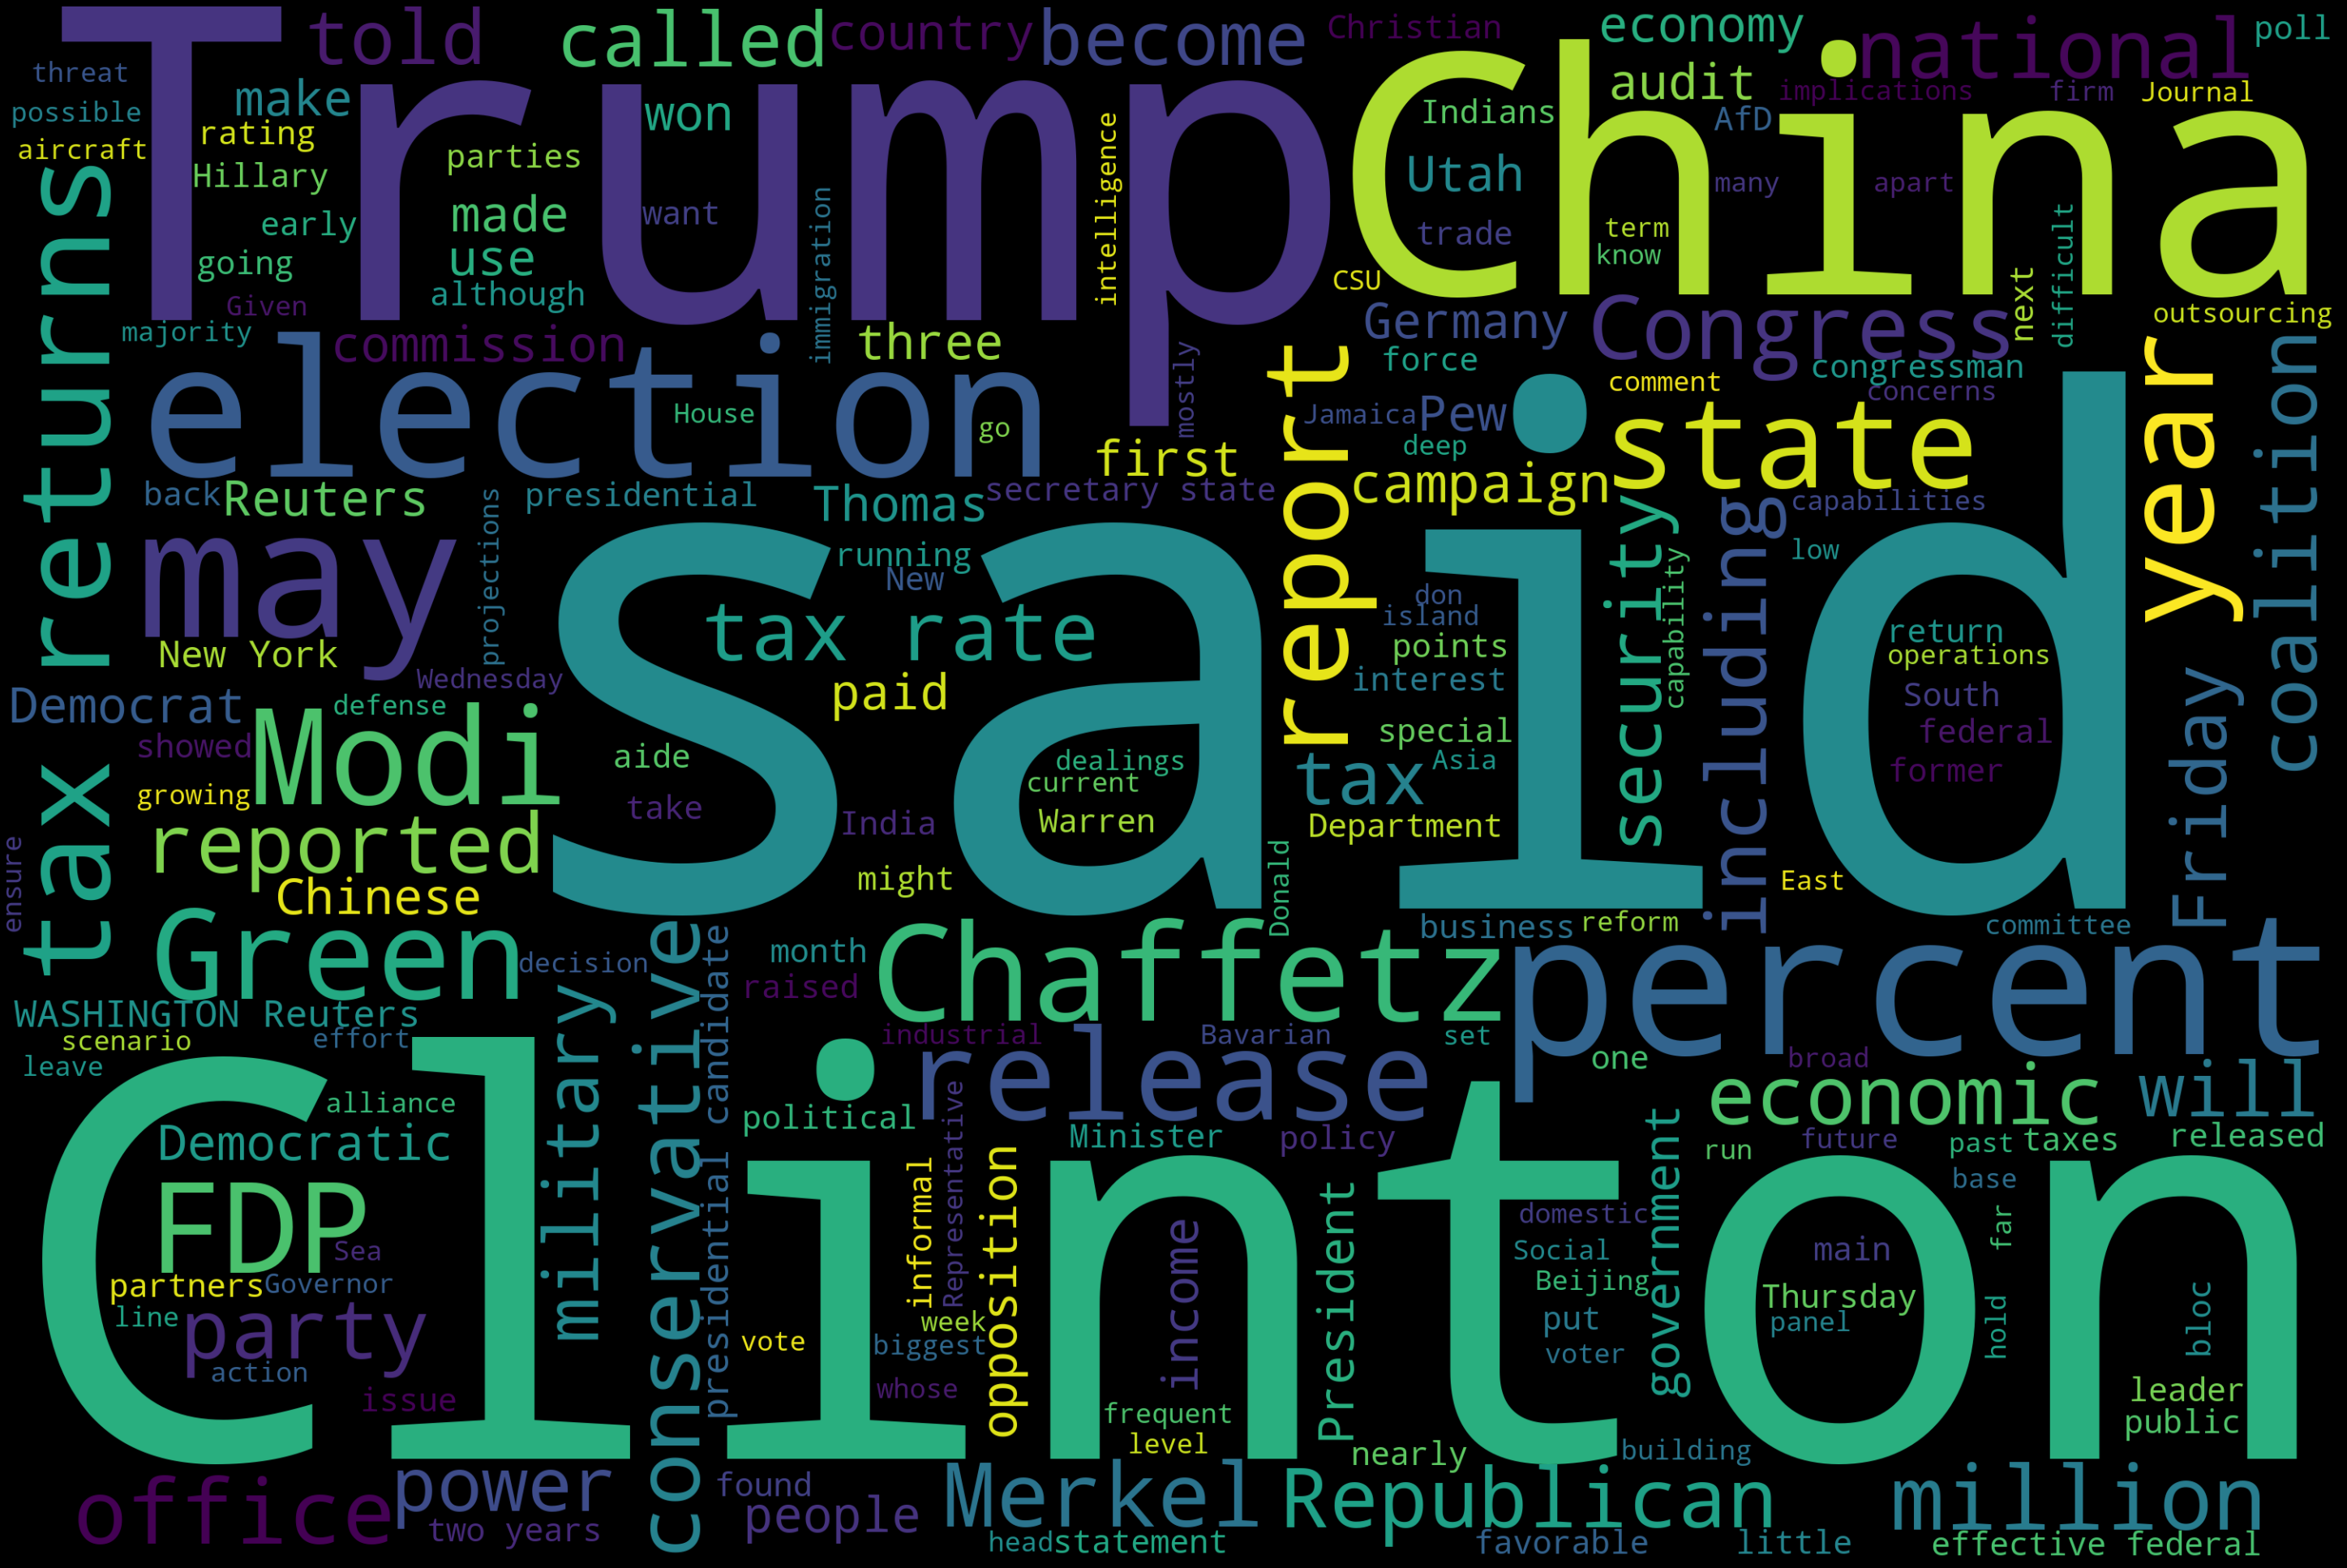

In [ ]:
true_text = true_news['text'].values
news_cloud(true_text)

- The word 'said' appears a lot in true news.
Most likely because true news quotes their source of information

In [21]:
politic_news = df_merged[df_merged['subject']=='politicsNews']
world_news = df_merged[df_merged['subject']=='worldnews']

In [22]:
politic_news['text'] = politic_news['text'].apply(tokenizeandstopwords)
world_news['text'] = world_news['text'].apply(tokenizeandstopwords)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


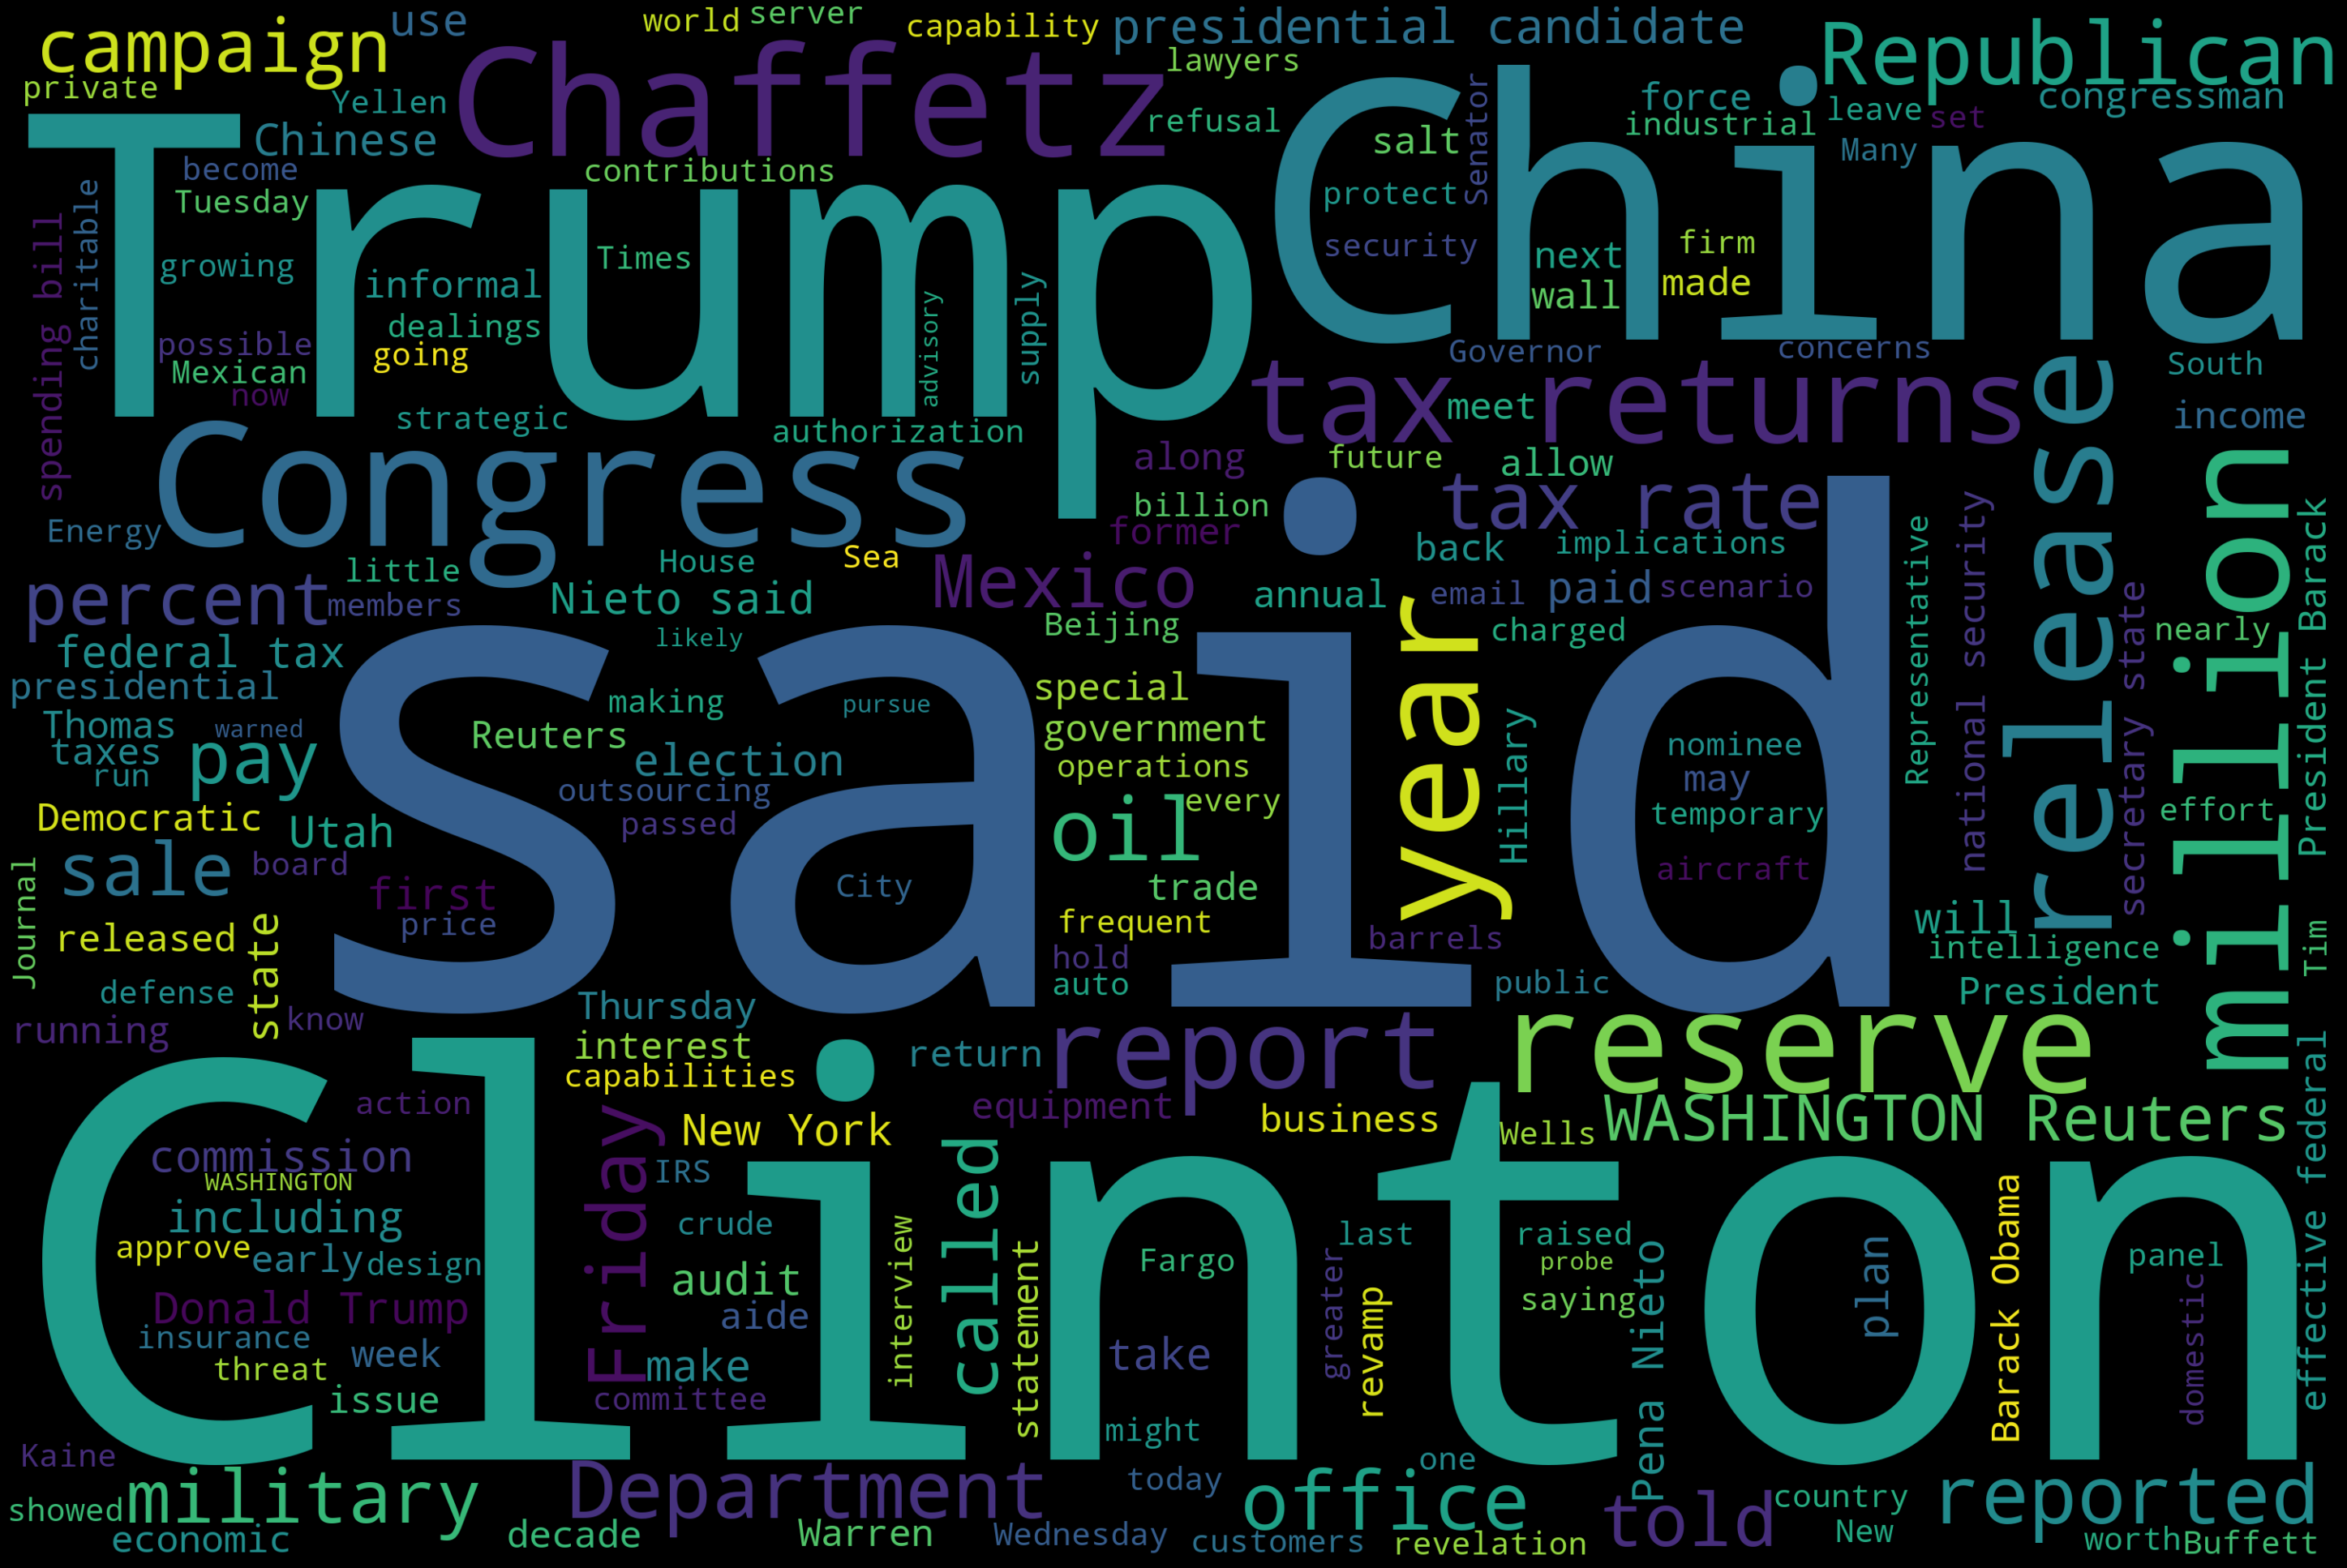

In [24]:
politics_text = politic_news['text'].values
news_cloud(politics_text)

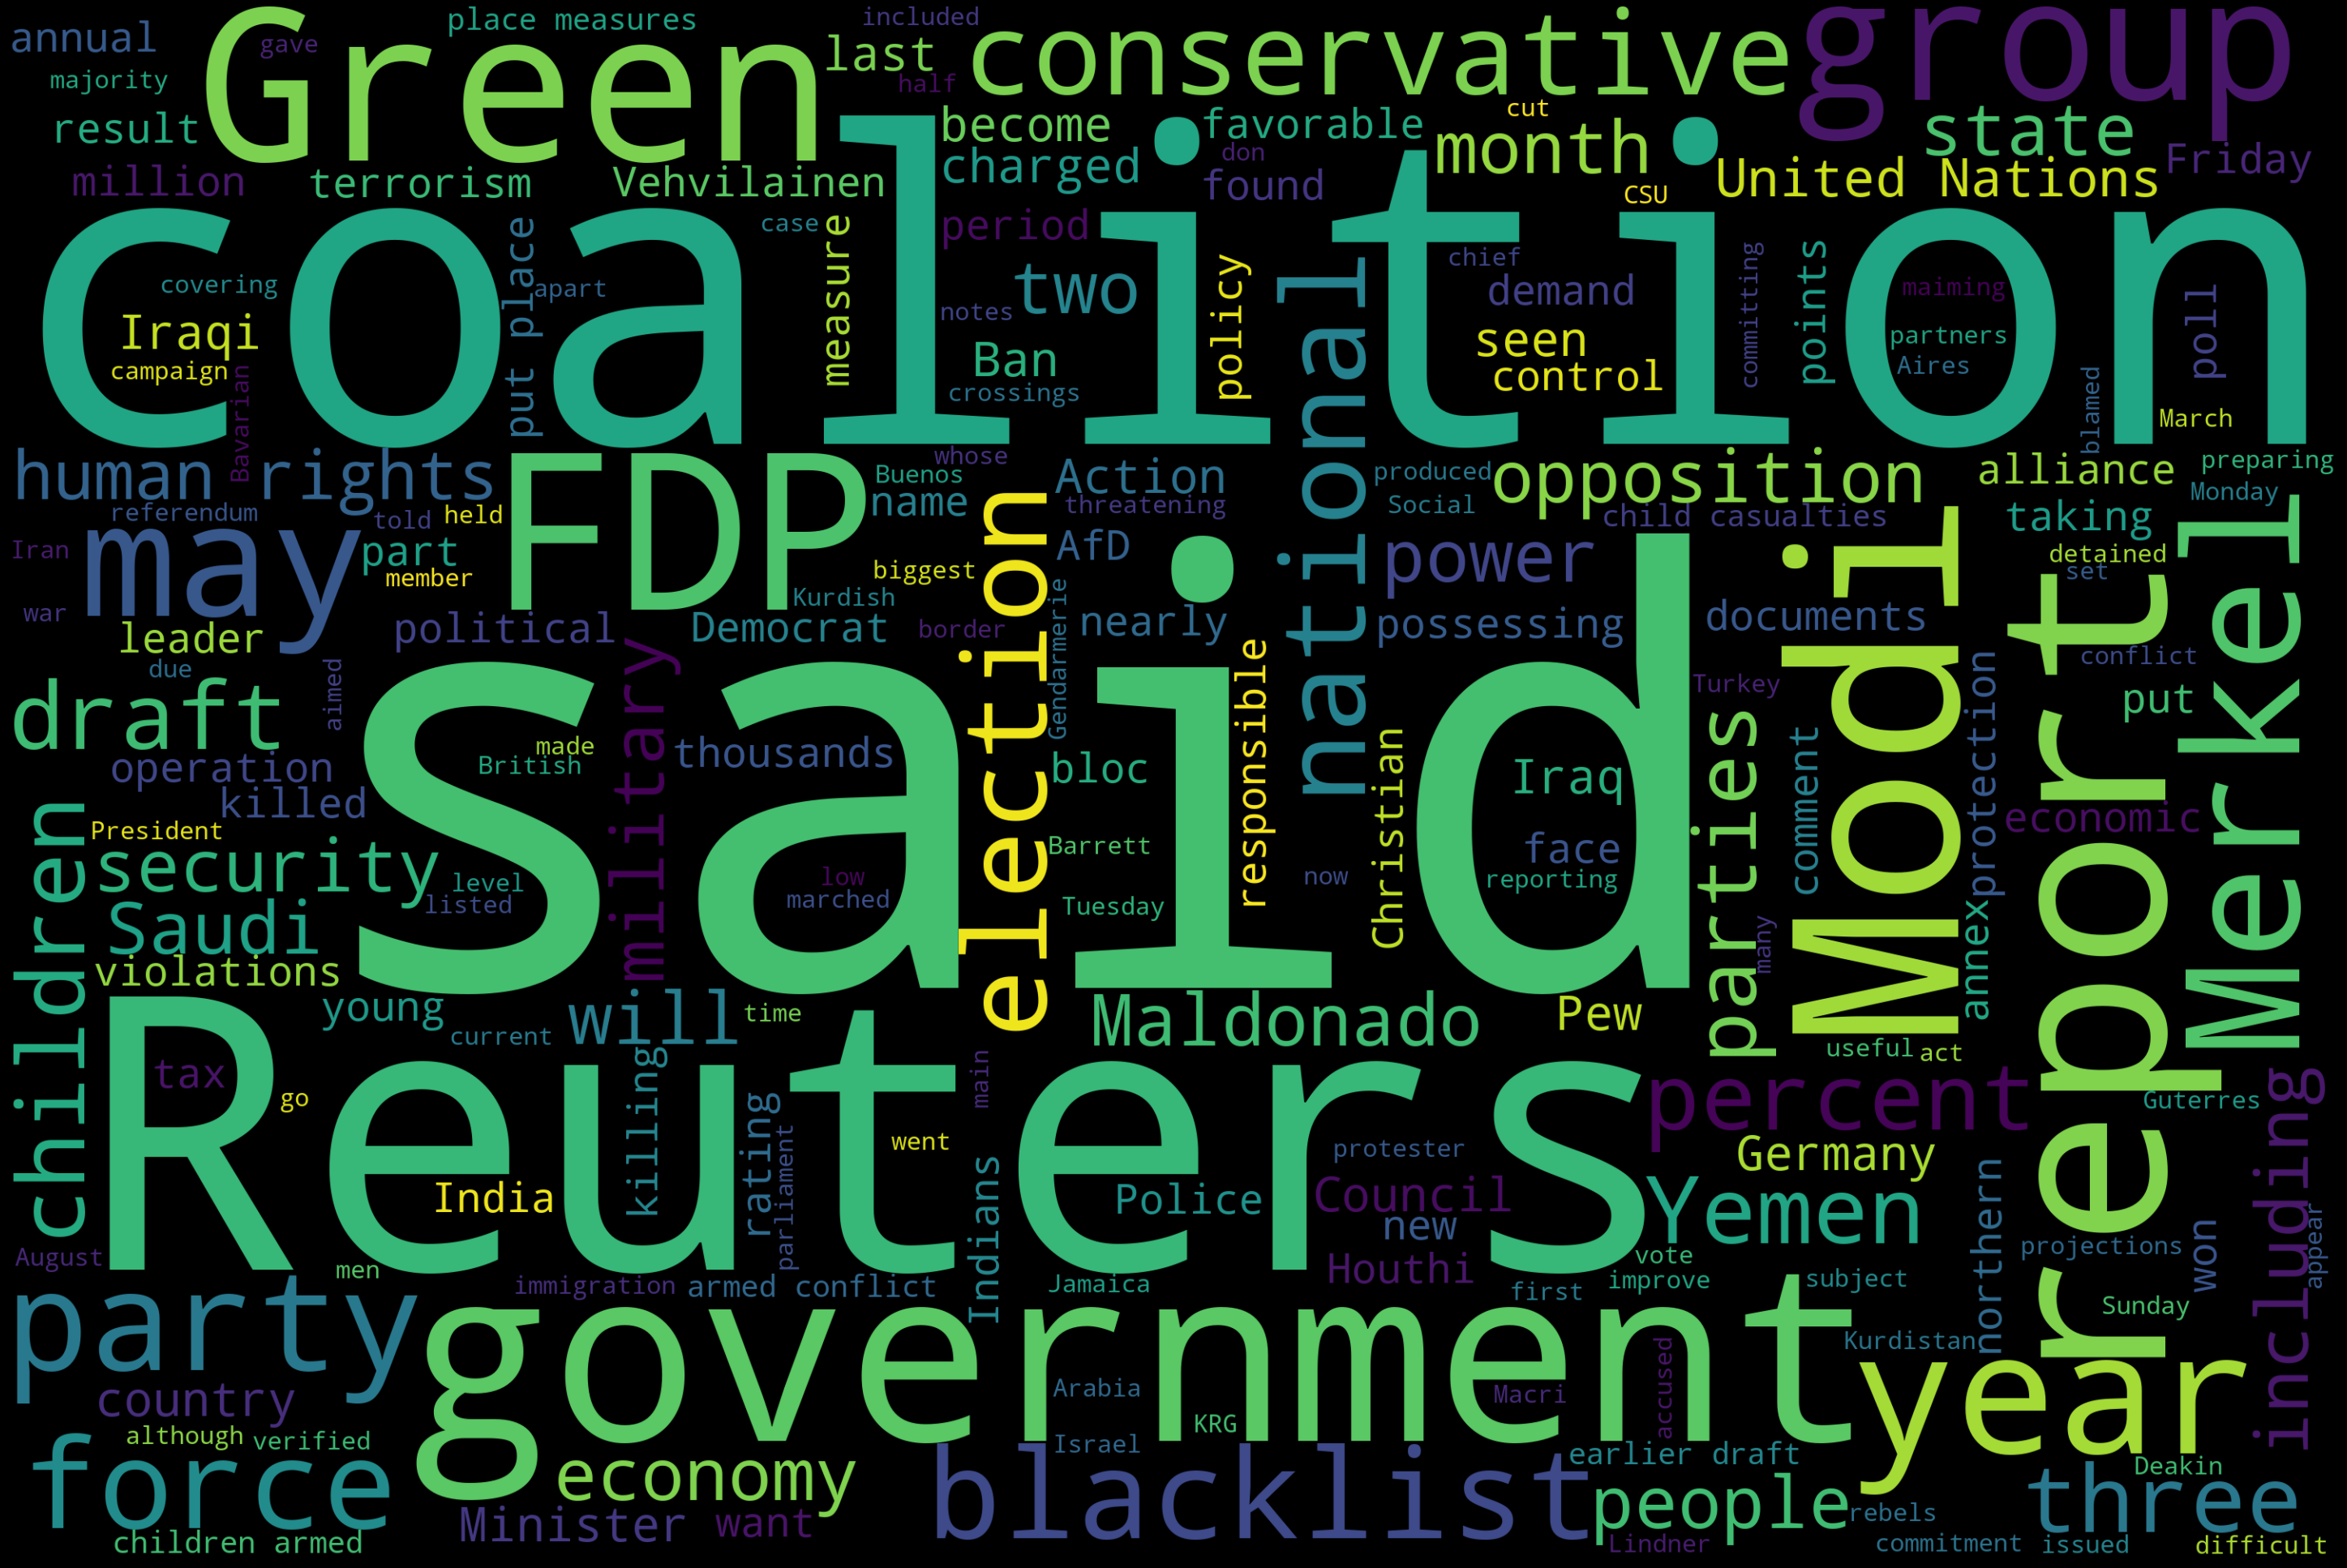

In [25]:
world_text = world_news['text'].values
news_cloud(world_text)

- From Wikipedia, Reuters is one of the largest news agencies in the world and as we can see from the world cloud, Reuters is contained in most true world news

In [27]:
df_merged.dtypes

title      object
text       object
subject    object
date       object
class       int64
dtype: object

In [36]:
#df_merged['date'] = pd.to_datetime(df_merged['date'])

In [29]:
df_merged['title_length'] = df_merged['title'].apply(lambda x : len(x.strip().split()))
df_merged['text_length'] = df_merged['text'].apply(lambda x : len(x.strip().split()))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


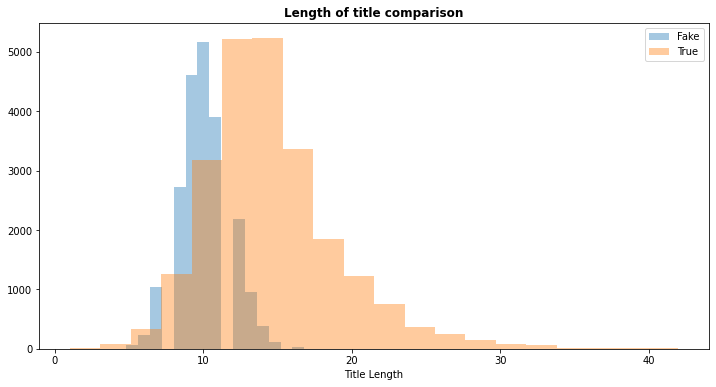

In [34]:
plt.figure(figsize=(12,6))
sns.distplot(df_merged[df_merged['class'] == 1]['title_length'], 
             kde=False, label='Fake', bins=20)
sns.distplot(df_merged[df_merged['class'] == 0]['title_length'], 
             kde=False, label='True', bins=20)
plt.xlabel('Title Length')
plt.title('Length of title comparison', weight='bold')
plt.legend()
plt.show()

- True news have longer titles than fake news